# DS 3000 HW 8

Due: Tues April 13 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.


# Part 1: Ethics (20 points)

Choose one Machine Learning application with ethical implications and write a few paragraphs (10 - 12 sentences) which:
- describe the application so a new reader can understand it
- raise one or more harms this application could potentially have
- discuss any ethical conflicts of interest which might arise:
    - e.g. social media platforms make more money by sharing untruthful, exciting news with their users by increasing their engagement time
- propose a solution
    - discuss why your solution helps
    - discuss what resources your solution will require to be impelemented
        - money?  
        - technical innovation?
        - political will?
        
Your solution need not be complete, but I find by attempting to solve a problem we're forced to characterize how it came to be.  This characterization skills is precisely what one needs to avoid building harmful ML in the first place.

You're welcome to write about any intersection of ML and ethics, but here are a few resources to get you thinking:

- [Game](https://www.moralmachine.net/): How should an automated car make decisions when all options given take life?

- [Podcast](https://www.thisamericanlife.org/729/making-the-cut/act-one-8): How do we decide who gets access to life saving treatment?

- [Article](https://www.bostonmagazine.com/news/2020/12/08/boston-segregation/): Redlining in Boston (How do we estimate housing prices?)

- [Academic Article](https://www.nature.com/articles/s41599-020-0501-9): This is a dense, but great survey.  (Automated driving & predicting future crime)

- [Ted talk](https://www.youtube.com/watch?v=_2u_eHHzRto): Cathy O'Neil highlights how Big Data causes problems.

# Answer of part one:

- With machines becoming smarter and self-sufficient, the need for human labor has become obsolete. Also since the technology and society has been developed so fast, the urgent need to have more intelligence system to assist human being for the further reasearch, regulation, and analysis, etc. I choose the Facial-recognition systems to be the applicaiton to explain. Facial-recognition systems are trained using a vast number of images to create ‘faceprints’ of people by mapping the geometry of certain facial features. Faceprints are used to classify a face into categories such as gender, age or race, and to compare it to other faceprints stored in databases. This technology can be useed in many aspects, like hte phone security, the camera monitoring,etc 


- However, if also along with many cons and potential harms. First, people's privacy are becoming less, since eveyone's facial data are being stored as a database. Tech companies are having all of these database which could be having the potential hacking risk of lossing the data. The hacker who crack the data could use these to track down the people's further infomation. 



- The ethical conflicts is that we are using human to monintoring the other people's personal informaiton including the facial images. First, this break the people's right of portraits. Also, people's eveyday info on the social media are being analysis by the facial recognitaion techniques. It becomes easier to analyze the people's personal characteristics or even more info.



- Therefore, the regulation of the company who have these databases are needed to be improved. The government should get involved in the regualtion. New laws of the info las enforcement should be more and more complete. Moreover, the data security technology to protect the data from being cracking by hackers should be improved. 



- To implement this, the companies and governments should utilize more resourcee, like a huge budget of money for the human resources of regulation and investigation, the technical innovation for the better protection of the databases, the political will to lead the people to trust the tech, accept the tech, and protect themselves' privacy rationaly.


# Predicting Boston property `price` from `area`

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(font_scale=1.5)

df_boston = pd.read_csv('boston_houses.csv', index_col=None)
df_boston.head(2)

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k


## Part 2: Exponential / Polynomial fit (45 points)

Predict the `price` of a house from `area` using threes models:
- a linear regression model:
$$ \texttt{price} = a_0 + a_1 \texttt{area} $$
- an exponential model:
$$ \texttt{price} = \alpha_0 e^{a_1 \texttt{area}}$$
- a degree 2 polynomial (quadratic):
$$ \texttt{price} = a_0 + a_1 \texttt{area} + a_2^2 \texttt{area}$$

For each model:
- print the full model, trained on the entire dataset including the coefficients which minimize MSE:
    - e.g. if $a_0 = 4$ and $a_1=5$ in the linear model you'd print: $ \texttt{price} = 4 + 5 \texttt{area} $
- compute the 10 fold cross validated $r^2$ value

Then, for all models:
- produce one plot which includes
    - a scatter plot of all samples (houses) of `price` and `area`
    - a line which shows each model:
        - linear
        - exponential
        - polynomial
    - add a legend to distinguish each line above which includes the cross validated $r^2$ value
        - e.g. `linear model r2=.5`
            - .5 is for illustrative purposes only, the linear model may or may not have this value
        
Finally, conclude with a single sentence which explains which, of these 3 models, produces the best fit.

In [2]:
# The helper functions from the course lecture as getting hte cross-val


# helper one 
def cross_val_r2(x, y, degree, n_splits=10):
    """ computes cross validated r2 (regression performance on unseen data)
    
    """
    # project x to polynomial
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
        
    # initialize empty y predictions
    y_pred = np.empty_like(y)
    
    # initialize linear regression model
    # fit_intercept=False since we're using poly features
    reg = LinearRegression(fit_intercept=False)
    
    kfold = KFold(n_splits=n_splits)
    for train_idx, test_idx in kfold.split(x_poly, y):
        # split data
        x_poly_test = x_poly[test_idx, :]
        x_poly_train = x_poly[train_idx, :]
        y_train = y[train_idx]
        
        # fit
        reg.fit(x_poly_train, y_train)
        
        # predict
        y_pred[test_idx] = reg.predict(x_poly_test)
        
    # compute cross validated r2
    r2 = r2_score(y_true=y, y_pred=y_pred)
    
    return r2


#helper twl
def coef_to_poly_str(coef, include_zero=False):
    """ creates a str of polynomial corresponding to coef    

    Args:
        coef (np.array): coefficients of polynomial
        
    Returns:
        poly_str (str): str of polynomial
    """
    
    str_monomial_list = []
    for deg, coef in enumerate(coef):
        if coef == 0 and include_zero == False:
            continue
        str_monomial_list.append(f'{coef:+.1f} x^{deg:d}')
        
    # handle case of all zero coef
    if len(str_monomial_list):
        poly_str = ' '.join(str_monomial_list)
    else:
        poly_str = '0'
        
    return f'y = {poly_str}'

In [3]:
# scripting to clean the data and deal with the prediciton :


x_feat_list = ['area']
x = df_boston.loc[:, x_feat_list].values
y = df_boston.loc[:, 'price'].values

In [4]:
x_feat_list


['area']

In [5]:
y

array([1100000.,  699000., 1750000.,  979000., 1875000.,  329000.,
        725000., 1499000., 1586000.,  898000.,  355000., 1795000.,
        765000.,  700000.,  649900.,  679000.,  449000.,  230000.,
        559000.,  619900., 1785000., 4999000.,  559000.,  747000.,
        469000., 1468000.,  699000., 1525000.,  689900., 2599000.,
       2294900.,  779900.,  319900., 1598000.,  581000., 1195000.,
        295000., 1100000.,  599988., 1089000.,  599900., 1575000.,
       1879000.,  975000.,  335000., 1495000., 1995000., 1495000.,
        669000.,  899999.,  564300.,  510000., 1635000.,  449000.,
       1695000.,  549000.,  399900., 1425000., 1249000.,  899900.,
        389900.,  329900.,  349900., 2750000., 1100000.,  599000.,
        495900., 3200000., 4595000.,  849900.,  359999., 4895000.,
        549000.,  589900.,  919000., 1275000., 1295000.,  939900.,
        749000., 1195000.,  960000.,  449900.,  549900., 1150000.,
       1399900.,  388888.,  509000.,  599990., 1399000.,  9370

# The prediciton by the linear regression model:


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [7]:
# creating the linear regression model
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)

In [8]:
# print model   
function = 'price' + f' = {reg.intercept_}'
for feat, coef in zip(x_feat_list, reg.coef_):
    function += f' + {coef}  * area'
print(function)

price = 185874.18452020187 + 431.58445121953605  * area


In [9]:
r2_linear_model = cross_val_r2(x,y,1)

r2_linear_model

print(f"the R^2 is {r2_linear_model}")

the R^2 is 0.36159466103997095


# The predciotn by the exponential model:



In [10]:
# running the exp regression

# initialize the regressional model
reg = LinearRegression()

# exp model
reg.fit(x, np.log(y))            
y_exp = np.exp(reg.predict(x))  

y_exp


array([ 1004384.71550903,   541456.68917958,   780351.19249142,
         789630.16588517,   800808.34786812,   623975.18211656,
         905620.24337708,  1521010.55891002,  1013085.87341289,
        1013085.87341289,   702044.91366323,  1872649.14279133,
         636254.50910474,   962909.59294828,   847396.72428646,
         604935.22485398,   576077.09600473,   552641.53297252,
         581067.75117872,   647946.93904594,  1436469.9529093 ,
         913174.00349954,   740281.45726469,  1160415.87856399,
         538696.02890185,  1011145.79136027,   589105.24149502,
        1360534.58105405,   811107.58925381,  2187194.35395624,
         685642.3451637 ,   932037.3932942 ,   492285.64009872,
        1978430.83029759,   677801.84360847,   572042.34507431,
         494334.44898282,   756056.34435946,   757265.02020135,
        1147146.2160865 ,   663871.77049632,  1127165.53547714,
        1579444.44610651,   560464.85063919,   730181.38579189,
         631394.72496974,  1233035.44423

In [11]:
# clean the data 
int_exp = reg.intercept_
coef_exp= reg.coef_[0]



In [12]:
# plot model
x_plot_exp = np.linspace(x.min(), x.max(), 101).reshape(-1, 1)


In [13]:
y_plot_exp = np.exp(reg.predict(x_plot_exp))


In [14]:
coef_exp

0.0003194763854392196

In [15]:

# intialize empty y 
y_predict_exp = np.empty_like(y)

kfold = KFold(n_splits=10)
for train_idx, test_idx in kfold.split(x, y):
    # split data
    x_exp_test = x[test_idx, :]
    x_exp_train = x[train_idx, :]
    y_train = y[train_idx]

    
    reg.fit(x_exp_train, y_train)

    # predict he y data by usng the regression model of expo.
    y_predict_exp[test_idx] = reg.predict(x_exp_test)

# compute cross validated r2
r2_exp = r2_score(y_true=y, y_pred=y_exp)

print (f'the exponential model is : \n price = {int_exp} * e^({coef_exp} * area)')


print(f'the R^2 is , {r2_exp}')

the exponential model is : 
 price = 12.994358708641013 * e^(0.0003194763854392196 * area)
the R^2 is , -0.4183272243002518


In [16]:
y_predict_exp

array([1305558.96177399,  469406.77942982,  964007.65667994,
        980004.36337422,  999027.47403768,  661367.25976116,
       1165479.69234301, 1867173.06977041, 1317232.23422657,
       1317232.23422657,  820901.98327977, 2148628.63890487,
        687740.20863551, 1248489.62978359, 1075552.26011572,
        619429.9476167 ,  553281.40371874,  497076.75857668,
        564954.67617132,  712383.78381318, 1789783.59684404,
       1176720.62137142,  892670.99169194, 1500978.18949869,
        462489.2846431 , 1314638.17368155,  583545.44341062,
       1716285.21473519, 1016321.21100447, 2358747.54305134,
        788908.56989122, 1204390.60051828,  340568.43902725,
       2222991.70786206,  773344.20662111,  543769.848387  ,
        346188.90354146,  921205.65768714,  923367.37480799,
       1485413.82622858,  745241.88405008, 1461634.93789924,
       1918189.59382243,  516099.86924014,  874080.22445264,
        677363.96645544, 1583123.44009093, 2075130.25679603,
        785017.47907369,

# The prediction by the a degree 2 polynomial (quadratic) model:


In [17]:
# polynomial dat cleaning for the prediciotn 

# process x to polynomial regression model
poly_feat = PolynomialFeatures(degree=2)
x_poly = poly_feat.fit_transform(x)


reg = LinearRegression()
reg.fit(x_poly, y)

# predict y for poly model 
y_pred_poly = reg.predict(x_poly)

coef_pred = reg.coef_


In [18]:
coef_pred

array([0.00000000e+00, 4.14423601e+02, 2.44807119e-03])

In [19]:
x_poly

array([[1.000000e+00, 2.584000e+03, 6.677056e+06],
       [1.000000e+00, 6.500000e+02, 4.225000e+05],
       [1.000000e+00, 1.794000e+03, 3.218436e+06],
       ...,
       [1.000000e+00, 1.088000e+03, 1.183744e+06],
       [1.000000e+00, 1.212000e+03, 1.468944e+06],
       [1.000000e+00, 1.933000e+03, 3.736489e+06]])

In [20]:
y_pred_poly


array([1293161.90021923,  476355.05839959,  957300.30780438,
        972962.32857318,  991596.15927802,  662254.76669912,
       1155046.51362318, 1852063.50495679, 1304694.71613955,
       1304694.71613955,  817486.9112577 , 2135267.39421129,
        687870.45477143, 1236830.62472686, 1066650.73945042,
        621559.14251005,  557462.77606881,  503091.87565776,
        568765.57122026,  711822.89131992, 1774557.02107368,
       1166110.87945989,  887537.7553454 , 1486700.05602738,
        469673.98761616, 1302131.55970029,  586773.68774832,
       1701092.75530418, 1008544.23089252, 2348044.25594024,
        786302.90428822, 1193360.34240952,  352125.84116874,
       2210438.92408579,  771142.00066498,  548255.73015133,
        357536.16644754,  915426.78063184,  917540.45464306,
       1471248.85033031,  743784.21848814, 1447655.09422275,
       1903242.95982618,  521485.07075705,  869379.10691995,
        677789.97738035, 1568353.20627209, 2061112.28275238,
        782512.08350111,

In [21]:
coef_pred

array([0.00000000e+00, 4.14423601e+02, 2.44807119e-03])

In [22]:
str_poly_pred = coef_to_poly_str(coef_pred)

print(f' the poly model is that : \n price: {str_poly_pred}\n')




 the poly model is that : 
 price: y = +414.4 x^1 +0.0 x^2



In [23]:

# cross validation

# initialize empty y predictions
y_pred_3 = np.empty_like(y)

reg = LinearRegression(fit_intercept=False)

kfold = KFold(n_splits=10)
for train_idx, test_idx in kfold.split(x_poly, y):
    # split data
    x_poly_test = x_poly[test_idx, :]
    x_poly_train = x_poly[train_idx, :]
    y_train = y[train_idx]

    # fit
    reg.fit(x_poly_train, y_train)

    # predict y for the model
    y_pred_3[test_idx] = reg.predict(x_poly_test)

# compute cross validated r2
r2_poly = r2_score(y_true=y, y_pred=y_pred_3)
print(f'the r2 of poly model is that : \n {r2_poly}')

the r2 of poly model is that : 
 0.3522866444695739


# the prediction figure:

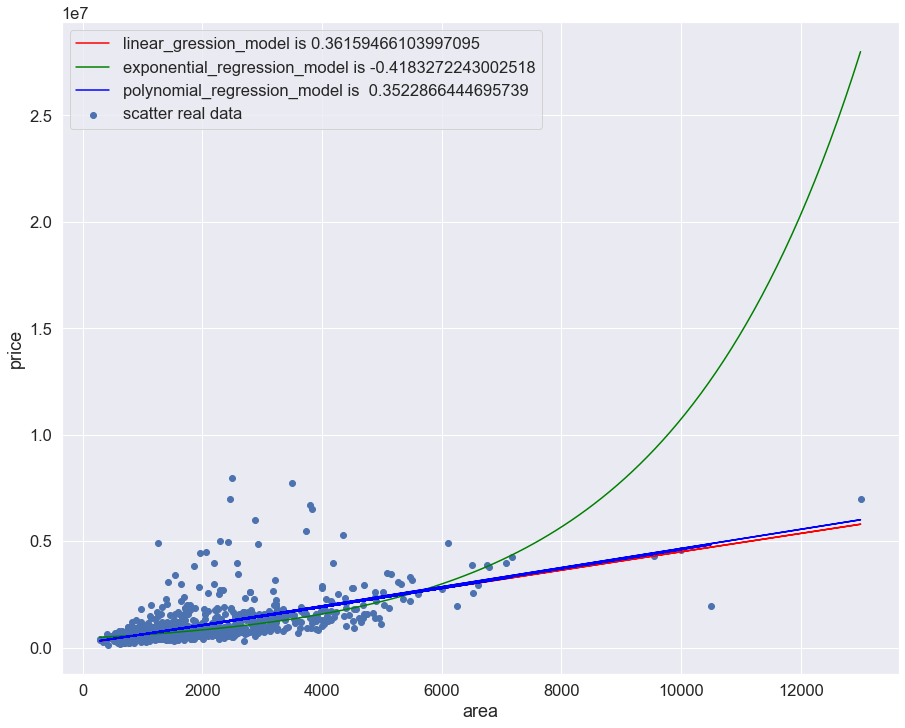

In [24]:
# plot all three models

plt.scatter(x, y, label = 'scatter real data ', alpha = 1)
plt.plot(x, y_pred, color='red', label=f'linear_gression_model is {r2_linear_model}')

plt.plot(x_plot_exp, y_plot_exp, color='green', label=f'exponential_regression_model is {r2_exp}')
plt.plot(x, y_pred_poly, color='blue', label=f'polynomial_regression_model is  {r2_poly}')

# set the variables name and the label
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.gcf().set_size_inches(15, 12)